In [2]:
#!pip list 
%pip install QuantLib
%pip install pandas_datareader
%pip install beautifulsoup4
%pip install yfinance
!pip list

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 48.6 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 36.6 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.2 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 3.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=8

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


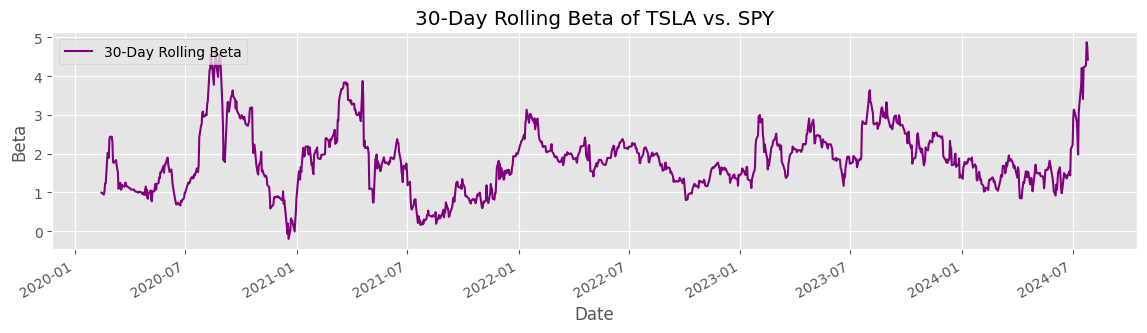

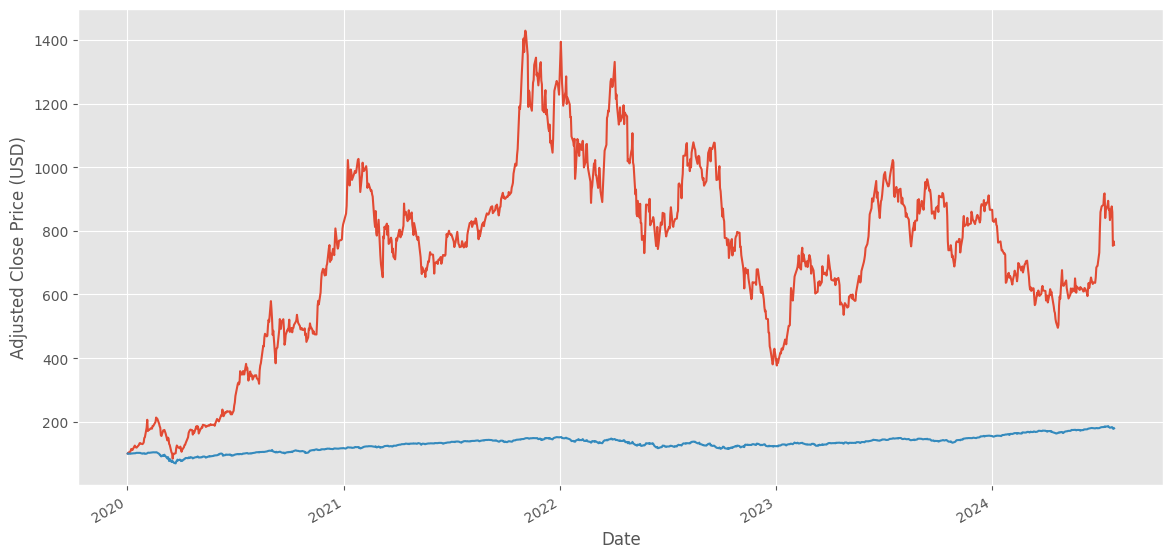

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import numpy as np

style.use ('ggplot')

start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
#df = web.DataReader("TSLA", 'yahoo', start, end)
#df = yf.download("TSLA", start=start, end=end)
#df.to_csv('tsla.csv')
#df = pd.read_csv('tsla.csv',parse_dates = True, index_col=0 )
#SPY = yf.download("SPY", start=start, end=end)
#print(df.head(10))
df_tsla = yf.download("TSLA", start=start, end=end)
df_spy = yf.download("SPY", start=start, end=end)


df_tsla['Growth'] = (df_tsla['Adj Close'] / df_tsla['Adj Close'].iloc[0]) * 100
df_spy['Growth'] = (df_spy['Adj Close'] / df_spy['Adj Close'].iloc[0]) * 100

df_spy.to_csv('SP500')
df_tsla.to_csv('Tesla')
returns_tsla = df_tsla['Adj Close'].pct_change().dropna()
returns_spy = df_spy['Adj Close'].pct_change().dropna()

rolling_covariance = returns_tsla.rolling(window=30).cov(returns_spy)
rolling_variance = returns_spy.rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance

cov_matrix = np.cov(returns_tsla, returns_spy)
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 2)
rolling_beta.plot(label='30-Day Rolling Beta', color='purple')
plt.title('30-Day Rolling Beta of TSLA vs. SPY')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend(loc='upper left')
plt.grid(True)


plt.figure(figsize=(14, 7))

#beta.plot()
df_tsla['Growth'].plot()
df_spy['Growth'].plot()

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.show()
